# Data Import and Visualization
# Pandas and Matplotlib Packages

### Python Libraries

Python has many built-in libraries that contain different functions and data types to make many tasks easier. 


For this course, we will focus primarily on the following libraries:

- **Numpy** is a library for working with arrays of data.

- **Pandas** provides high-performance, easy-to-use data structures and data analysis tools.

-    **Matplotlib** is a library for making graphs.

- **Seaborn** is a higher-level interface to Matplotlib that can be used to simplify many graphing tasks.

A few other useful libraries:

- **Scipy** is a library of techniques for numerical and scientific computing.

- **Statsmodels** is a library that implements many statistical techniques.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
## We don't usually need the whole matplotlib package, but pyplot for sure!
%matplotlib inline  
## This makes it look nicer in the Jupyter notebook setting. 
import seaborn as sns
## I don't know why sns is the convention here, but it is.

![superbowl](https://www.newswise.com/images/uploads/2019/01/29/SuperBowl.jpg)

# The superbowl is coming!

Maybe you are, or aren't, excited. But suppose that you are at least interested because your family has a superbowl pool$^{**}$ under the following terms:
- Ten people enter the pool and everyone is randomly assigned a digit from 0 to 9. 
- The scores of both teams are added at the end of half time and the person with the last digit of the combined scores wins half the pool.
- Similarly, the scores of both teams are added at the end of the game and the person with the last digit of combined scores wins the other half of the pool. 

You have the number 0 and your significant other has the number 2. 

You, being analytically inclined, have some questions. What are they? How would you answer them?

** Based on a true story.

# Pandas

Pandas is a useful package for data manipulation and analysis.

The  library’s  name  derives from **panel data**,  a  common  term  for  multidimensional  datasets encountered in statistics and econometrics.

Pandas primarily uses a data type called **dataframes**, made up of **series**, which are based on **dictionaries**.

## Data Structures 
- Series and DataFrames  
- Series = cross between a list and a dictionary.
- Both an order and a label.
- Think of Series as two columns of data. 
- Column 1=index. Column 2=data. (Similar to dictionary.)
- Columns can also have labels. (Heading row).
- DataFrames consist of multiple Series. 
- Think of DataFrames as multiple columns of data.
- Each column of DataFrame is a Series.

## Importing Data

In [3]:
## This is the location of a local file on my machine 
## where I collected some superbowl info from the web.
urlsb='/Users/tbveenstra/Desktop/S21/ML/superbowl data/superbowl_stats.csv'
## What if the data is on a website instead.
url2="https://bulldog2.redlands.edu/fac/tamara_veenstra/ML/superbowl_stats.csv"

In [11]:
## In this case, we will read in a csv file, but other files types can be used.
df=pd.read_csv(url2)

In [12]:
## Use tab to check out the options
#df=pd.read_

## Examining Your Data
Its always a good first step to examine your data!

In [13]:
## To see the first five lines of the dataframe:
df.head()
## 5 is the default number, but it can be changed.
## For example, df.head(12) would list the first 12 lines of data.

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
0,2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0,NaN
1,2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0,NaN
2,2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0,NaN
3,2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0,**OT added into 4th quarter
4,2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0,NaN


- This data set has box scores for previous superbowl games. 
- Box scores give the number of points scored in each quarter of a football game.
- The first row of the data set came in as the header for the columns.
- Use df=pd.read_csv(url, header=None) if there is no header row.
- An index for the rows was assigned automatically (numerically in order).
- Note there were repeated column names in the csv file. Each column must have a distinct name, so the .1 was added.

In [14]:
df.columns

Index(['Year', 'Team 1', '1st', '2nd', '3rd', '4th', 'Final', 'Team 2',
       '1st.1', '2nd.1', '3rd.1', '4th.1', 'Final.1', 'Unnamed: 13'],
      dtype='object')

In [15]:
df.index

RangeIndex(start=0, stop=59, step=1)

In [16]:
## To see the last 5 lines of the data set
df.tail()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2017 only game with OT. OT score added to fou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## We always want to check the dimensions of our data!
df.shape

(59, 14)

In [18]:
## A quick analysis of numerical data
df.describe()

,1st,2nd,3rd,4th,Final,1st.1,2nd.1,3rd.1,4th.1,Final.1
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.00000
mean,4.555556,7.055556,5.388889,7.314815,24.314815,3.740741,6.148148,5.333333,6.777778,22.00000
std,4.311751,6.388128,5.014758,5.572250,10.399245,4.605924,6.066945,5.035721,6.166454,11.74734
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,3.00000
25%,0.000000,3.000000,0.000000,3.000000,17.000000,0.000000,0.000000,0.000000,0.000000,13.25000
50%,3.000000,6.500000,6.000000,7.000000,24.000000,3.000000,7.000000,6.500000,7.000000,21.00000
75%,7.000000,10.000000,7.000000,10.000000,30.750000,7.000000,10.000000,7.000000,12.250000,31.00000
max,14.000000,35.000000,21.000000,25.000000,55.000000,14.000000,21.000000,17.000000,21.000000,52.00000


In [19]:
## Examine data types
df.dtypes

Year            object
Team 1          object
1st            float64
2nd            float64
3rd            float64
4th            float64
Final          float64
Team 2          object
1st.1          float64
2nd.1          float64
3rd.1          float64
4th.1          float64
Final.1        float64
Unnamed: 13     object
dtype: object

In [20]:
## OK, there are some problems. What are they?

## Cleaning up the Data

### What does NaN mean???

NaN means not a number and indicates some problem with the data.

In this case, there were some empty cells which got read in as NaNs. 

We should fix this.

### Removing Rows

In [21]:
##Let's drop a row.
df.drop(58)

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
0,2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0,NaN
1,2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0,NaN
2,2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0,NaN
3,2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0,**OT added into 4th quarter
4,2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0,NaN
5,2015,"New England Patriots (AFC, 12-4)",0.0,14.0,0.0,14.0,28.0,"Seattle Seahawks (NFC, 12-4)",0.0,14.0,10.0,0.0,24.0,NaN
6,2014,"Seattle Seahawks (NFC, 13-3)",8.0,14.0,14.0,7.0,43.0,"Denver Broncos (AFC, 13-3)",0.0,0.0,8.0,0.0,8.0,NaN
7,2013,"Baltimore Ravens (AFC, 10-6)",7.0,14.0,7.0,6.0,34.0,"San Francisco 49ers (NFC, 11-4-1)",3.0,3.0,17.0,8.0,31.0,NaN
8,2012,"New York Giants (NFC, 9-7)",9.0,0.0,6.0,6.0,21.0,"New England Patriots (AFC, 13-3)",0.0,10.0,7.0,0.0,17.0,NaN
9,2011,"Pittsburgh Steelers (AFC, 12-4)",0.0,10.0,7.0,8.0,25.0,"Green Bay Packers (NFC, 10-6)",14.0,7.0,0.0,10.0,31.0,NaN


In [22]:
df.tail()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2017 only game with OT. OT score added to fou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
## Be careful, df.drop() doesn't actually change the dataframe
## unless we include inplace=True
df.drop(58, inplace=True)

In [24]:
df.tail()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
53,1967,"Kansas City Chiefs (AFL, 11-2-1)",0.0,10.0,0.0,0.0,10.0,"Green Bay Packers (NFL, 12-2)",7.0,7.0,14.0,7.0,35.0,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
## drop multiple rows
df.drop( [56,57], inplace=True)
## We'll come back for the rest of the rows.

In [26]:
df.tail()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
51,1969,"New York Jets (AFL, 11-3)",0.0,7.0,6.0,3.0,16.0,"Baltimore Colts (NFL, 13-1)",0.0,0.0,0.0,7.0,7.0,NaN
52,1968,"Green Bay Packers (NFL, 9-4-1)",3.0,13.0,10.0,7.0,33.0,"Oakland Raiders (AFL, 13-1)",0.0,7.0,0.0,7.0,14.0,NaN
53,1967,"Kansas City Chiefs (AFL, 11-2-1)",0.0,10.0,0.0,0.0,10.0,"Green Bay Packers (NFL, 12-2)",7.0,7.0,14.0,7.0,35.0,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing Columns

In [27]:
df.head()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1,Unnamed: 13
0,2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0,NaN
1,2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0,NaN
2,2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0,NaN
3,2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0,**OT added into 4th quarter
4,2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0,NaN


In [28]:
## Need the name of the column to drop
df.columns

Index(['Year', 'Team 1', '1st', '2nd', '3rd', '4th', 'Final', 'Team 2',
       '1st.1', '2nd.1', '3rd.1', '4th.1', 'Final.1', 'Unnamed: 13'],
      dtype='object')

In [29]:
## note drop acts on rows by default, so we need to tell it to act on columns
df.drop(columns="Unnamed: 13", inplace=True)

In [30]:
df.head()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1
0,2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0
1,2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0
2,2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0
3,2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0
4,2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0


### Dropping all rows that contain a NaN
Note: if we did this originally it would have dropped all but one row.   
Definitely look at the data carefully before doing this. 

In [31]:
df.dropna(inplace=True)
## This drops any row with a NaN.

In [32]:
df.tail()

,Year,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1
49,1971,"Baltimore Colts (AFC, 11-2-1)",0.0,6.0,0.0,10.0,16.0,"Dallas Cowboys (NFC, 10-4)",3.0,10.0,0.0,0.0,13.0
50,1970,"Minnesota Vikings (NFL, 12-2)",0.0,0.0,7.0,0.0,7.0,"Kansas City Chiefs (AFL, 11-3)",3.0,13.0,7.0,0.0,23.0
51,1969,"New York Jets (AFL, 11-3)",0.0,7.0,6.0,3.0,16.0,"Baltimore Colts (NFL, 13-1)",0.0,0.0,0.0,7.0,7.0
52,1968,"Green Bay Packers (NFL, 9-4-1)",3.0,13.0,10.0,7.0,33.0,"Oakland Raiders (AFL, 13-1)",0.0,7.0,0.0,7.0,14.0
53,1967,"Kansas City Chiefs (AFL, 11-2-1)",0.0,10.0,0.0,0.0,10.0,"Green Bay Packers (NFL, 12-2)",7.0,7.0,14.0,7.0,35.0


In [33]:
## Does our shape make sense now?
df.shape

(54, 13)

### Fixing Data Types

In [34]:
df.dtypes

Year        object
Team 1      object
1st        float64
2nd        float64
3rd        float64
4th        float64
Final      float64
Team 2      object
1st.1      float64
2nd.1      float64
3rd.1      float64
4th.1      float64
Final.1    float64
dtype: object

In [35]:
## Do these make sense?
## Maybe Year should be an object (string)? Maybe it should be a number?
df["Year"]=pd.to_numeric(df["Year"],errors='coerce',downcast='integer')

In [36]:
df.dtypes

Year         int16
Team 1      object
1st        float64
2nd        float64
3rd        float64
4th        float64
Final      float64
Team 2      object
1st.1      float64
2nd.1      float64
3rd.1      float64
4th.1      float64
Final.1    float64
dtype: object

Note: It was important to remove Nans first. 
    
NaNs are classified as floating point numbers so we could not have converted to integer.

In general, things can go wrong easily if there are NaNs left in your data. 

### Setting an index

In [37]:
df.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53],
           dtype='int64')

In [38]:
## This isn't really a helpful index. 
## Let's set the year (first column of our dataframe) to be the index.
df.set_index('Year', inplace=True)

In [39]:
df.head()

,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1
Year,,,,,,,,,,,,
2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0
2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0
2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0
2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0
2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0


In [40]:
## Note we have one less column.
df.shape

(54, 12)

### Changing the Column Names

In [41]:
df.head()

,Team 1,1st,2nd,3rd,4th,Final,Team 2,1st.1,2nd.1,3rd.1,4th.1,Final.1
Year,,,,,,,,,,,,
2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0
2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0
2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0
2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0
2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0


In [42]:
## To change names in the columns we use rename and
## specify a dictionary {old_name:new_name}
df.rename(columns={'1st':'Team1 1st', '2nd':'Team1 2nd', '3rd':'Team1 3rd', '4th':'Team1 4th', 'Final':'Team1 Final'}, inplace=True)

In [43]:
## That was a little tedious. Here's a fancier way for Team 2 column names.
for col in df.columns:  ##loop through all the column names
    if col[-2:]==".1":  ## check if the end with .1
        new_name="Team2 "+col[0:-2] ## create a new name which is Team2 concatenated with the previous name minus the .1 part
        new_name_dict={col:new_name} ## dictionary has a single element in the form {old_name:new_name}
        df.rename(columns={col:new_name}, inplace=True) ## use rename for each column

In [44]:
df.head()

,Team 1,Team1 1st,Team1 2nd,Team1 3rd,Team1 4th,Team1 Final,Team 2,Team2 1st,Team2 2nd,Team2 3rd,Team2 4th,Team2 Final
Year,,,,,,,,,,,,
2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0
2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0
2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0
2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0
2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0


## Accessing components of Dataframe

### Columns
Use Column Name

In [45]:
df.columns

Index(['Team 1', 'Team1 1st', 'Team1 2nd', 'Team1 3rd', 'Team1 4th',
       'Team1 Final', 'Team 2', 'Team2 1st', 'Team2 2nd', 'Team2 3rd',
       'Team2 4th', 'Team2 Final'],
      dtype='object')

In [46]:
## How to access a column
print(type(df['Team1 1st']))
df['Team1 1st']
## A column is a series.
## A series is like an ordered dictionary {2020:3.0, 2019:0.0, ...} 

<class 'pandas.core.series.Series'>


Year
2020     3.0
2019     0.0
2018     9.0
2017     0.0
2016     0.0
2015     0.0
2014     8.0
2013     7.0
2012     9.0
2011     0.0
2010     0.0
2009     3.0
2008     3.0
2007     6.0
2006     3.0
2005     0.0
2004     0.0
2003     3.0
2002     3.0
2001     7.0
2000     3.0
1999     7.0
1998     7.0
1997    14.0
1996    10.0
1995     7.0
1994     6.0
1993     7.0
1992     0.0
1991     3.0
1990    13.0
1989     0.0
1988     0.0
1987    10.0
1986    13.0
1985    10.0
1984     0.0
1983     7.0
1982     7.0
1981    14.0
1980     7.0
1979     7.0
1978    10.0
1977     0.0
1976     7.0
1975     0.0
1974     0.0
1973     7.0
1972     3.0
1971     0.0
1970     0.0
1969     0.0
1968     3.0
1967     0.0
Name: Team1 1st, dtype: float64

In [47]:
## Access individual items in a column using square brackets. Similar to a dictionary. 
## Need to use the key from the index.
df['Team 1'][2020]

'San Francisco 49ers (NFC, 13-3)'

### Rows
Use loc or iloc

In [48]:
## We can access a row by index location, or iloc.
## df[0]  ## not this way
df.iloc[0] ##gives the row in location 0.  

Team 1         San Francisco 49ers (NFC, 13-3)
Team1 1st                                    3
Team1 2nd                                    7
Team1 3rd                                   10
Team1 4th                                    0
Team1 Final                                 20
Team 2          Kansas City Chiefs (AFC, 12-4)
Team2 1st                                    7
Team2 2nd                                    3
Team2 3rd                                    0
Team2 4th                                   21
Team2 Final                                 31
Name: 2020, dtype: object

In [49]:
type(df.iloc[0])

pandas.core.series.Series

In [50]:
## Accessing single elements in a row/series is similar to a dictionary.
print(df.iloc[0]['Team 2'])

Kansas City Chiefs (AFC, 12-4)


In [51]:
##We can also access the row by the name in its location or index name, using loc.
df.loc[2010]

Team 1         New Orleans Saints (NFC, 13-3)
Team1 1st                                   0
Team1 2nd                                   6
Team1 3rd                                  10
Team1 4th                                  15
Team1 Final                                31
Team 2         Indianapolis Colts (AFC, 14-2)
Team2 1st                                  10
Team2 2nd                                   0
Team2 3rd                                   7
Team2 4th                                   0
Team2 Final                                17
Name: 2010, dtype: object

In [52]:
## This is the same as
df.iloc[10]
## because 'Year':2010  is row 10

Team 1         New Orleans Saints (NFC, 13-3)
Team1 1st                                   0
Team1 2nd                                   6
Team1 3rd                                  10
Team1 4th                                  15
Team1 Final                                31
Team 2         Indianapolis Colts (AFC, 14-2)
Team2 1st                                  10
Team2 2nd                                   0
Team2 3rd                                   7
Team2 4th                                   0
Team2 Final                                17
Name: 2010, dtype: object

# Hooray! We cleaned up our dataframe and understand our data!
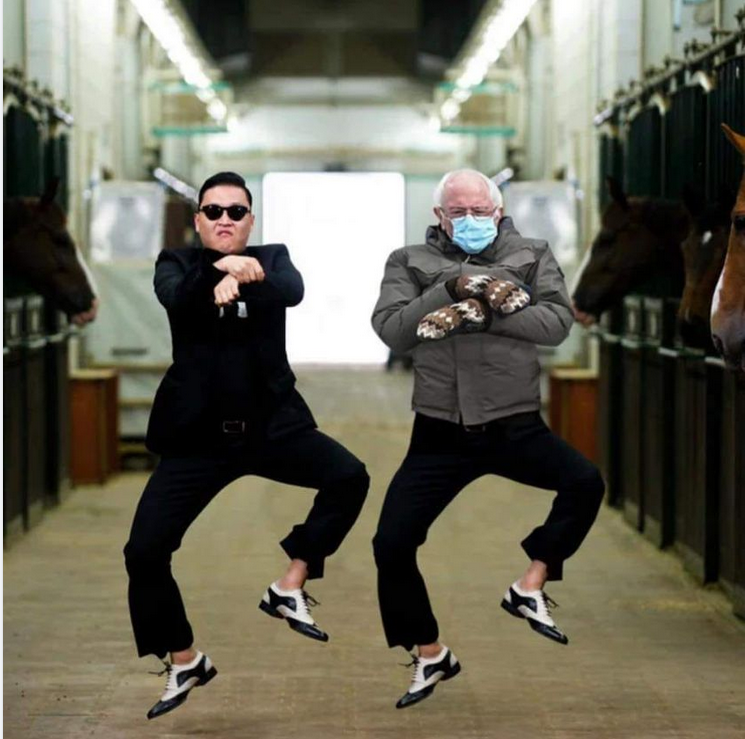

## Time to answer some questions!
Which number is most likely to win the half time pool based on the previous 54 superbowls?

We need to calculated the combined half time score and find the last digit.

### Adding Columns based on existing columns

In [53]:
## Similar to adding new element to a dictionary.
df['Combined Half']=df['Team1 1st']+df['Team1 2nd']+df['Team2 1st']+df['Team2 2nd']

In [54]:
df.head()

,Team 1,Team1 1st,Team1 2nd,Team1 3rd,Team1 4th,Team1 Final,Team 2,Team2 1st,Team2 2nd,Team2 3rd,Team2 4th,Team2 Final,Combined Half
Year,,,,,,,,,,,,,
2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0,20.0
2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0,3.0
2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0,34.0
2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0,24.0
2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0,20.0


In [55]:
df["half pool"]=df['Combined Half']%10

In [56]:
df.head()

,Team 1,Team1 1st,Team1 2nd,Team1 3rd,Team1 4th,Team1 Final,Team 2,Team2 1st,Team2 2nd,Team2 3rd,Team2 4th,Team2 Final,Combined Half,half pool
Year,,,,,,,,,,,,,,
2020,"San Francisco 49ers (NFC, 13-3)",3.0,7.0,10.0,0.0,20.0,"Kansas City Chiefs (AFC, 12-4)",7.0,3.0,0.0,21.0,31.0,20.0,0.0
2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0,3.0,3.0
2018,"Philadelphia Eagles (NFC, 13-3)",9.0,13.0,7.0,12.0,41.0,"New England Patriots (AFC, 13-3)",3.0,9.0,14.0,7.0,33.0,34.0,4.0
2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0,24.0,4.0
2016,"Carolina Panthers (NFC, 15-1)",0.0,7.0,0.0,3.0,10.0,"Denver Broncos (AFC, 12-4)",10.0,3.0,3.0,8.0,24.0,20.0,0.0


In [57]:
## What do the stats look like for the half time winner?
## Use .value_counts() to give a frequency count
result=df['half pool'].value_counts()
result
## This is sorted by counts.

4.0    9
0.0    9
7.0    8
3.0    7
6.0    5
9.0    5
1.0    3
2.0    3
8.0    3
5.0    2
Name: half pool, dtype: int64

# Hooray we answered our first question!
![cat](https://static.boredpanda.com/blog/wp-content/uploads/2019/04/funny-dancing-cats-fb3.png)

## But now we want to see the results visually.

# Visualizing the Data
Using Matplotlib and Seaborn

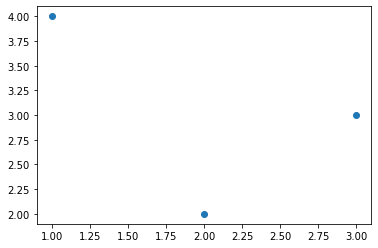

In [58]:
## Simple scatter plot
## Remember we imported plt from matplotlib
x=[1,2,3]
y=[4,2,3]
plt.scatter(x,y)
plt.show()

In [59]:
## need to get x and y values from result
type(result)

pandas.core.series.Series

In [60]:
## Access columns in series with .index and .values
print("column 1", result.index)
print("column 2",result.values)

column 1 Float64Index([4.0, 0.0, 7.0, 3.0, 6.0, 9.0, 1.0, 2.0, 8.0, 5.0], dtype='float64')
column 2 [9 9 8 7 5 5 3 3 3 2]


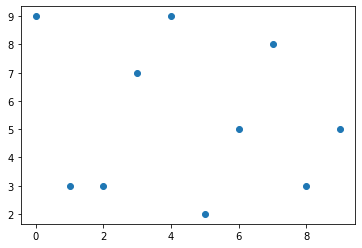

In [61]:
plt.scatter(result.index,result.values)
plt.show()

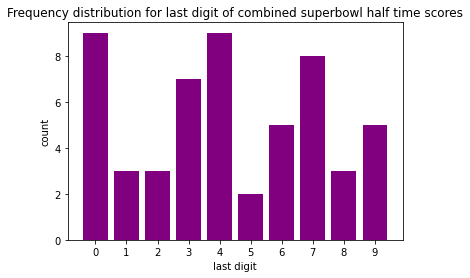

In [62]:
## Maybe a bar chart would be better
## We should add some labels and title as well
plt.bar(result.index,result.values,width=.8,color='purple')
plt.title("Frequency distribution for last digit of combined superbowl half time scores")
plt.xlabel("last digit")
plt.ylabel("count")
plt.xticks(np.arange(10))
plt.show()

C:\Users\Maggie\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


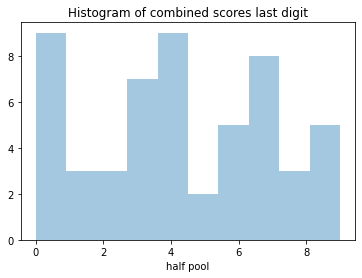

In [63]:
## seaborn will automatically compute the frequency distribution for you
sns.distplot(df["half pool"], kde = False, bins=10).set_title("Histogram of combined scores last digit")
plt.show()

# What about the pool for the final score???
You'll do that in the HW.

### Querying a Dataframe

In [64]:
## Which games are close?
test=abs(df['Team1 Final']-df['Team2 Final']) <4  ##within a field goal (= 3points) is definition of close.
test

Year
2020    False
2019    False
2018    False
2017    False
2016    False
2015    False
2014    False
2013     True
2012    False
2011    False
2010    False
2009    False
2008     True
2007    False
2006    False
2005     True
2004     True
2003    False
2002     True
2001    False
2000    False
1999    False
1998    False
1997    False
1996    False
1995    False
1994    False
1993    False
1992    False
1991     True
1990    False
1989    False
1988    False
1987    False
1986    False
1985    False
1984    False
1983    False
1982    False
1981    False
1980    False
1979    False
1978    False
1977    False
1976    False
1975    False
1974    False
1973    False
1972    False
1971     True
1970    False
1969    False
1968    False
1967    False
dtype: bool

In [65]:
## This created a Boolean Mask which might be enough.
## How many games are close?
sum(test)
## False=0, True=1

7

In [66]:
## To create a dataframe to see all the games that are close.
dfclose = df[test]
dfclose

,Team 1,Team1 1st,Team1 2nd,Team1 3rd,Team1 4th,Team1 Final,Team 2,Team2 1st,Team2 2nd,Team2 3rd,Team2 4th,Team2 Final,Combined Half,half pool
Year,,,,,,,,,,,,,,
2013,"Baltimore Ravens (AFC, 10-6)",7.0,14.0,7.0,6.0,34.0,"San Francisco 49ers (NFC, 11-4-1)",3.0,3.0,17.0,8.0,31.0,27.0,7.0
2008,"New York Giants (NFC, 10-6)",3.0,0.0,0.0,14.0,17.0,"New England Patriots (AFC, 16-0)",0.0,7.0,0.0,7.0,14.0,10.0,0.0
2005,"New England Patriots (AFC, 14-2)",0.0,7.0,7.0,10.0,24.0,"Philadelphia Eagles (NFC, 13-3)",0.0,7.0,7.0,7.0,21.0,14.0,4.0
2004,"Carolina Panthers (NFC, 11-5)",0.0,10.0,0.0,19.0,29.0,"New England Patriots (AFC, 14-2)",0.0,14.0,0.0,18.0,32.0,24.0,4.0
2002,"St. Louis Rams (NFC, 14-2)",3.0,0.0,0.0,14.0,17.0,"New England Patriots (AFC, 11-5)",0.0,14.0,3.0,3.0,20.0,17.0,7.0
1991,"Buffalo Bills (AFC, 13-3)",3.0,9.0,0.0,7.0,19.0,"New York Giants (NFC, 13-3)",3.0,7.0,7.0,3.0,20.0,22.0,2.0
1971,"Baltimore Colts (AFC, 11-2-1)",0.0,6.0,0.0,10.0,16.0,"Dallas Cowboys (NFC, 10-4)",3.0,10.0,0.0,0.0,13.0,19.0,9.0


For more complicated queries

Can use | for or and & for and

Parentheses are required

In [67]:
## What games had no scoring in the first quarter (for either team).
dfnew=df[ (df['Team1 1st']==0) & (df['Team2 1st']==0) ]
dfnew

,Team 1,Team1 1st,Team1 2nd,Team1 3rd,Team1 4th,Team1 Final,Team 2,Team2 1st,Team2 2nd,Team2 3rd,Team2 4th,Team2 Final,Combined Half,half pool
Year,,,,,,,,,,,,,,
2019,"New England Patriots (AFC, 11-5)",0.0,3.0,0.0,10.0,13.0,"Los Angeles Rams (NFC, 13-3)",0.0,0.0,3.0,0.0,3.0,3.0,3.0
2017,"New England Patriots (AFC, 14-2)",0.0,3.0,6.0,25.0,34.0,"Atlanta Falcons (NFC, 11-5)",0.0,21.0,7.0,0.0,28.0,24.0,4.0
2015,"New England Patriots (AFC, 12-4)",0.0,14.0,0.0,14.0,28.0,"Seattle Seahawks (NFC, 12-4)",0.0,14.0,10.0,0.0,24.0,28.0,8.0
2005,"New England Patriots (AFC, 14-2)",0.0,7.0,7.0,10.0,24.0,"Philadelphia Eagles (NFC, 13-3)",0.0,7.0,7.0,7.0,21.0,14.0,4.0
2004,"Carolina Panthers (NFC, 11-5)",0.0,10.0,0.0,19.0,29.0,"New England Patriots (AFC, 14-2)",0.0,14.0,0.0,18.0,32.0,24.0,4.0
1992,"Washington Redskins (NFC, 14-2)",0.0,17.0,14.0,6.0,37.0,"Buffalo Bills (AFC, 13-3)",0.0,0.0,10.0,14.0,24.0,17.0,7.0
1977,"Oakland Raiders (AFC, 13-1)",0.0,16.0,3.0,13.0,32.0,"Minnesota Vikings (NFC, 11-2-1)",0.0,0.0,7.0,7.0,14.0,16.0,6.0
1975,"Pittsburgh Steelers (AFC, 10-3-1)",0.0,2.0,7.0,7.0,16.0,"Minnesota Vikings (NFC, 10-4)",0.0,0.0,0.0,6.0,6.0,2.0,2.0
1969,"New York Jets (AFL, 11-3)",0.0,7.0,6.0,3.0,16.0,"Baltimore Colts (NFL, 13-1)",0.0,0.0,0.0,7.0,7.0,7.0,7.0


In [68]:
## How many games had at least one team with no score in the first quarter?
dfnew=df[ (df['Team1 1st']==0) | (df['Team2 1st']==0) ]
dfnew['Team 1'].count()

35

### More Visualization

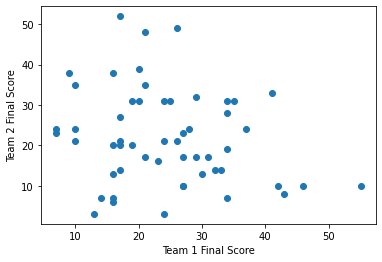

In [69]:
## Can use columns from data frames
xval=df['Team1 Final']
yval=df['Team2 Final']
plt.scatter(xval,yval)
plt.xlabel("Team 1 Final Score")
plt.ylabel("Team 2 Final Score")
plt.show()

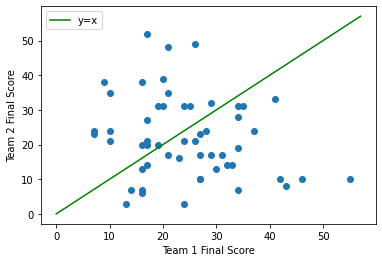

In [70]:
## Which games are close?  
## Add a line for x=y
## Plotting functions

ptmax=max(df['Team1 Final'].max(),df['Team2 Final'].max())+2

x = np.linspace(0, ptmax, 100)
## numpy array with 100 numbers evenly spaced between 0 and df['Team2 Final'].max()
## generating a bunch of points to plot a line with

plt.plot(x, x, label='y=x',color="green")
plt.legend()
plt.scatter(xval,yval)
plt.xlabel("Team 1 Final Score")
plt.ylabel("Team 2 Final Score")
plt.show()

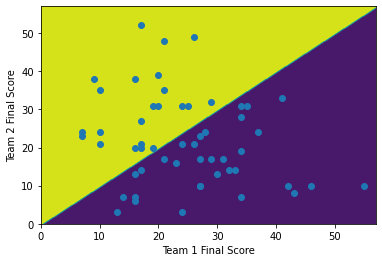

In [71]:
## Shade above and below line for Team 1 versus Team 2 winner.
## Example of filled countour plot

# generate 100 x and y values between 0 and max for each axis
x = np.linspace(0, ptmax, 100).reshape(-1, 1)
y = np.linspace(0, ptmax, 100).reshape(-1, 1)

# make X and Y matrices representing all combinations of x and y values for 2D plane
X, Y = np.meshgrid(x,y)

# compute z value of a point as a function of x and y 
## if X>Y return 1 since Team 1 wins, if X<=Y return 2 since Team 2 wins
Z = np.where(X-Y > 0, 1, 2)

# plot filled contour map 
plt.contourf(X, Y, Z)

# include scatterplot from before
plt.scatter(xval,yval)
plt.xlabel("Team 1 Final Score")
plt.ylabel("Team 2 Final Score")
plt.show()

### Converting a column of dataframe to numpy array

In [72]:
df.iloc[0].to_numpy()

array(['San Francisco 49ers (NFC, 13-3)', 3.0, 7.0, 10.0, 0.0, 20.0,
       'Kansas City Chiefs (AFC, 12-4)', 7.0, 3.0, 0.0, 21.0, 31.0, 20.0,
       0.0], dtype=object)

### Adding a row to a dataframe

In [73]:
## Adding a row requires a dictionary
new_row={'Team 1':'Kansas City Chiefs (AFC)', 'Team1 1st':7, 'Team1 2nd':3, 'Team1 3rd':10, 'Team1 4th':7,
       'Team1 Final':27, 'Team 2':'Tampa Bay Buccaneers (NFC)', 'Team2 1st':3, 'Team2 2nd':10, 'Team2 3rd':0,
       'Team2 4th':7, 'Team2 Final':20, 'Combined Half Time Score':23, 'half pool':3}

In [74]:
## And a series, so we can specify the index
new_row = pd.Series(new_row, name='2021')

In [75]:
df=df.append(new_row)

In [76]:
df.tail()

,Team 1,Team1 1st,Team1 2nd,Team1 3rd,Team1 4th,Team1 Final,Team 2,Team2 1st,Team2 2nd,Team2 3rd,Team2 4th,Team2 Final,Combined Half,half pool,Combined Half Time Score
Year,,,,,,,,,,,,,,,
1970,"Minnesota Vikings (NFL, 12-2)",0.0,0.0,7.0,0.0,7.0,"Kansas City Chiefs (AFL, 11-3)",3.0,13.0,7.0,0.0,23.0,16.0,6.0,NaN
1969,"New York Jets (AFL, 11-3)",0.0,7.0,6.0,3.0,16.0,"Baltimore Colts (NFL, 13-1)",0.0,0.0,0.0,7.0,7.0,7.0,7.0,NaN
1968,"Green Bay Packers (NFL, 9-4-1)",3.0,13.0,10.0,7.0,33.0,"Oakland Raiders (AFL, 13-1)",0.0,7.0,0.0,7.0,14.0,23.0,3.0,NaN
1967,"Kansas City Chiefs (AFL, 11-2-1)",0.0,10.0,0.0,0.0,10.0,"Green Bay Packers (NFL, 12-2)",7.0,7.0,14.0,7.0,35.0,24.0,4.0,NaN
2021,Kansas City Chiefs (AFC),7.0,3.0,10.0,7.0,27.0,Tampa Bay Buccaneers (NFC),3.0,10.0,0.0,7.0,20.0,NaN,3.0,23.0


In [77]:
df.drop('2021', inplace=True)

## Pandas cheat sheet

https://www.datacamp.com/community/blog/python-pandas-cheat-sheet#gs.oundfxM

In [78]:
# To attach local image.
#![superbowl.png](attachment:superbowl.png)
#Convert the cell to markdown by:

#1. Convert cell to Markdown mode
#2. Now go to menu bar and select Edit -> Insert Image.
#3. Select image from your disk and upload.